<a href="https://colab.research.google.com/github/Gurpreet654/Modified-Multi-interactive-Dual-Decoder-Thesis-/blob/main/Test_and_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/MIDD/working_MIDD_CODES2'

Mounted at /content/drive
/content/drive/MyDrive/MIDD/working_MIDD_CODES2


In [ ]:
%cd '/content/drive/MyDrive/MIDD/working_MIDD_CODES2'
coding='utf-8'
import os
from net2 import Mnet
import torch
import random
import numpy as np
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from lib.dataset import Data
from lib.data_prefetcher import DataPrefetcher
from torch.nn import functional as F
# from smooth_loss import get_saliency_smoothness
# import floss
# from floss import DiceLoss
import matplotlib.pyplot as plt
import torch as nn
from itertools import compress
from keras.metrics import MeanIoU

/content/drive/MyDrive/MIDD/working_MIDD_CODES2


Test Setup

loading model from /content/drive/MyDrive/MIDD/working_MIDD_CODES2/model/final_batch1_try56wg_M.pth...
frame_006552.png
1


(-0.5, 191.5, 191.5, -0.5)

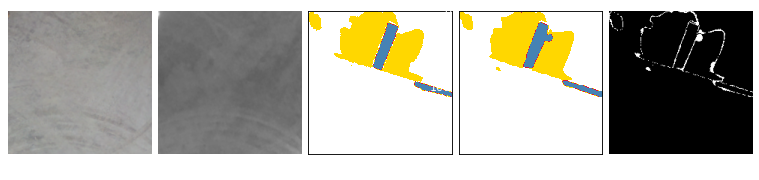

In [ ]:
# # %cd '/content/drive/MyDrive/MIDD/working_MIDD_CODES2'
# %cd '/content/drive/MyDrive/MIDD/working_MIDD_CODES2'
# coding='utf-8'
# import os
from net2 import Mnet
# import torch
# import random
# import numpy as np
# import torch.optim as optim
# from torch.utils.data import DataLoader, random_split
from lib.dataset import Data
# from lib.data_prefetcher import DataPrefetcher
# from torch.nn import functional as F
# # from smooth_loss import get_saliency_smoothness
# # import floss
# from floss import DiceLoss
# import matplotlib.pyplot as plt
# import torch as nn

# import torch
# import cv2
# import time
# from net import Mnet
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"
#%%
# ttest2='frame_006200.png'
ttest1 = Data(['frame_006552.png'])
# ttest1 = Data(['frame_006050.png'])
# ttest2=next(aa1)
# ttest1 = Data(ttest2[2])
# ttest1 = Data(['frame_005233.png'])
if __name__ == '__main__':
    model_path='/content/drive/MyDrive/MIDD/working_MIDD_CODES2/model/final_batch1_try56wg_M.pth'
    out_path = './output/'
    out_path_score1='./output2_score1/'
    out_path_score2='./output2_score2/'
    # data  = Data(root='/content/drive/MyDrive/MIDD/working_MIDD_CODES2/DataSet',mode='test')
    loader_T = DataLoader(ttest1, batch_size=1,shuffle=False)
    net = Mnet().cuda()
    print('loading model from %s...' % model_path)
    net.load_state_dict(torch.load(model_path))
    if not os.path.exists(out_path): os.mkdir(out_path)
    # time_s = time.time()
    img_num = len(loader_T)
    name1=[]
    loss_t=[]
    n_unique=[]
    confus=np.zeros((4,4))
    # recall_object=[]
    # accu_object=[]
    # accu_pixel=[]
    # recall_pixel=[] 
    # vallo=[]
    # ovr=[]
    # mk=[]
    lp=[]
    # mk1=[]
    klot=[]
    i=0
    net.eval()
    with torch.no_grad():
        # for rgb, t,_, (H, W), name in loader:
        for rgb, t,label,glabel,name  in loader_T:
            name = name[0].split('\\')[-1]
            # print(name)
            rgb=rgb.to('cuda')
            t=t.to('cuda')
            label=label.to('cuda')
            score,gI= net(rgb.float(), t.float())
            # Dd=smp.losses.DiceLoss('multilabel')
          
            # Dd=DiceLoss()
            # test_loss=0
            # test_loss=Dd(score,label)
            # #score = F.interpolate(score, size=(H, W), mode='nearest')
            
            # score_ = torch.argmax(score,dim=1)
            # pred = np.squeeze(score_.cpu().data.numpy())
            # ss=torch.softmax(dim=1)
            pred = np.argmax(np.squeeze(score.cpu().data.numpy()),0)
            # pred1 = np.argmax(np.squeeze(score1.cpu().data.numpy()),0)
            # pred2 = np.argmax(np.squeeze(score2.cpu().data.numpy()),0)
            # plt.imshow(pred)
            # cv2.imwrite(os.path.join(out_path, name[:-4] + '.png'), pred)
            # print(np.unique(pred))
            print(name)
            name1.append(name)
            # loss_t.append(test_loss.data.cpu().numpy())
            # n_unique.append(np.unique(pred))
            label1=np.argmax(np.squeeze(label.cpu().data.numpy()),0)
            pred_reshaped = pred.reshape(-1)
            label_reshaped = label1.reshape(-1)
            confus+=confusion_matrix(label_reshaped, pred_reshaped,labels=[0, 1, 2,3])
            # a,b,c,d,e,f,g=region_cal(score,label,0,0,name)
            i=i+1
            # recall_object.append(a)
            # accu_object.append(b)
            # accu_pixel.append(c)
            # recall_pixel.append(d)
            # klot.append(g)
            # vallo.append(e)
            # ovr.append(f)
            # lp.append(f)

            # if a>0:
            #   i+=1
            print(i)
            # print(name)
            # tt,rr=temp_diff(score,label,rawt)
            # mk.append(tt)
            # mk1.append(rr)
            # if  a.any()<0.60:
            #   print(a,name)
            #   print(np.unique(pred))
            # xx=k
            # pred = np.squeeze(torch.sigmoid(score).cpu().data.numpy())
            # cv2.imwrite(os.path.join(out_path, name[:-4] + '.png'), pred)
            # score1=F.interpolate(score1, size=(H, W), mode='bilinear',align_corners=True)
            
            # sc1pred = np.squeeze(torch.sigmoid(score1).cpu().data.numpy())
            # score2=F.interpolate(score2, size=(H, W), mode='bilinear',align_corners=True)
            # sc2pred = np.squeeze(torch.sigmoid(score2).cpu().data.numpy())
            
            # cv2.imwrite(os.path.join(out_path_score1, name[:-4] + '.png'), 255 * sc1pred)
            # cv2.imwrite(os.path.join(out_path_score2, name[:-4] + '.png'), 255 * sc2pred)
    # time_e = time.time()
    # print('speed: %f FPS' % (img_num / (time_e - time_s)))
    # https://stackoverflow.com/questions/69163577/cnn-model-predicting-only-first-class
# region_cal(score,label)
# discrete_matshow(label1,pred)
from matplotlib.pyplot import figure

difference=cv2.subtract(label1,pred)
difference1=difference.reshape(-1)
for i in range (0,difference.size):
  if difference1[i]==0:
    difference1[i]=255
  else:
    difference1[i]=0
d1=difference1.reshape(192,192)

figure(figsize=(12, 8), dpi=80)
plt.subplot(1,5,3)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
discrete_matshow(label1,pred)
# plt.axis('off')
plt.subplot(1,5,4)
discrete_matshow(pred,pred)
# plt.axis('off')
ttest2 = 'frame_003837.png'
rr='/content/drive/MyDrive/MIDD/working_MIDD_CODES2/DataSet/RGB'
tt='/content/drive/MyDrive/MIDD/working_MIDD_CODES2/DataSet/FLIR'
import matplotlib.image as mpimg
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.subplot(1,5,1)
plt.imshow(mpimg.imread(os.path.join(rr,ttest2)))
plt.axis('off')
plt.subplot(1,5,2)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.imshow(cv2.imread(os.path.join(tt,ttest2)))
# plt.imshow(mpimg.imread(os.path.join(rr,str(str(ttest2[2]))[2:-2] )))
# plt.axis('off')
# plt.subplot(5,1,2)
# plt.imshow(cv2.imread(os.path.join(tt,str(str(ttest2[2]))[2:-2] )))
plt.axis('off')
plt.subplot(1,5,5)
plt.imshow(d1,'binary')
plt.axis('off')
# print(a,b,c,d,e,f,g)
# print(ttest2)

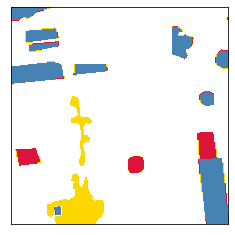

In [ ]:
l=(label[0,3,:,:].cpu().numpy()).astype(np.uint8)
p=((score[0,1,:,:].cpu().numpy()).round()).astype(np.uint8)
totalLabels_l, label_ids_l, values_l, centroid_l= cv2.connectedComponentsWithStats(l,16,cv2.CV_32S)
# totalLabels, label_ids, values, centroid= cv2.connectedComponentsWithStats(l,16,cv2.CV_32S)
# ll=5
# plt.imshow(l)
# area = values_l[ll, cv2.CC_STAT_AREA]
# area
# label_ids_l.shape
# totalLabels_l
plt.subplot(1,1,1,xticks=[], yticks=[])
discrete_matshow(label1,label1)
# cv2.Make

Visulisation of Predictions

Text(0.5, 0, 'Object Size')

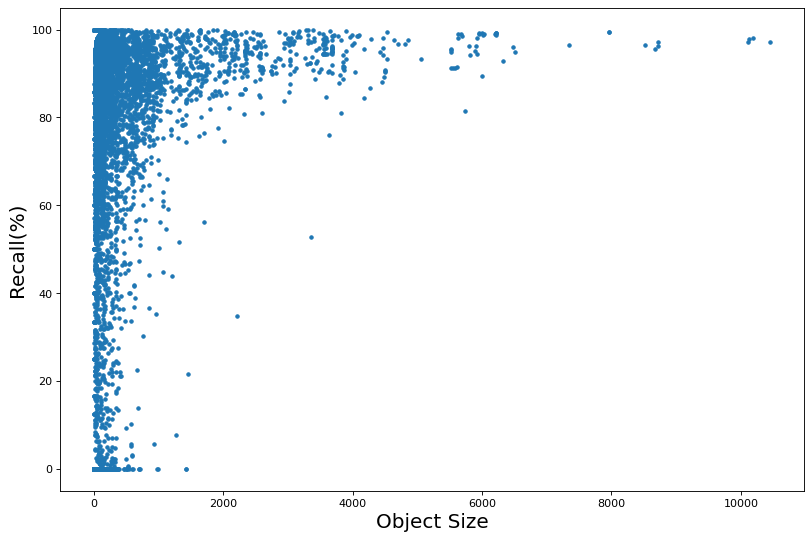

In [ ]:
# MI
# from matplotlib
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)
plt.plot(ovr12,ovr11,'.')
# plt.legend(["Trainning","Validation"])
plt.ylabel('Recall(%)',fontsize=18)
plt.xlabel('Object Size',fontsize=18)

Text(0.5, 0, 'Object Size')

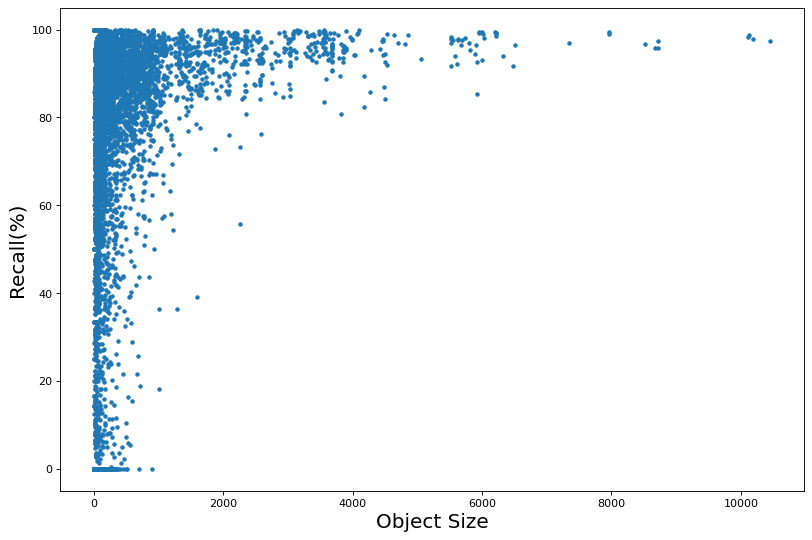

In [ ]:
# from matplotlib
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)
plt.plot(ovr12,ovr11,'.')
# plt.legend(["Trainning","Validation"])
plt.ylabel('Recall(%)',fontsize=18)
plt.xlabel('Object Size',fontsize=18)

Text(0.5, 0, 'Temperature')

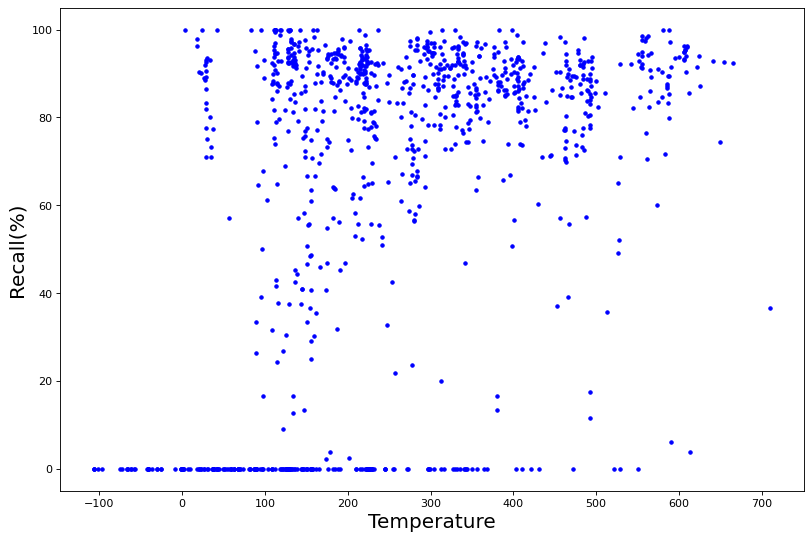

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)
# plt.plot(mk[1],mk1[1],'o')
# plt.plot(mk[0],mk1[0],'o')
# klp=type(np.array(mk))
# klp.reshape(-1,1)

for i in range (0,len(mk)):
  plt.plot(mk[i],np.array(mk1[i])*100,'b.')
plt.ylabel('Recall(%)',fontsize=18)
plt.xlabel('Temperature',fontsize=18)

Text(0.5, 0, 'Temperature')

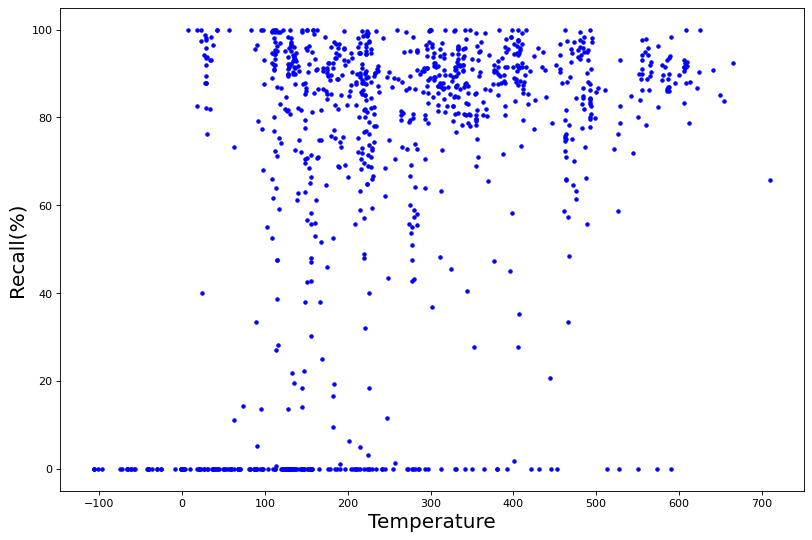

In [ ]:
#MI
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)
# plt.plot(mk[1],mk1[1],'o')
# plt.plot(mk[0],mk1[0],'o')
# klp=type(np.array(mk))
# klp.reshape(-1,1)

for i in range (0,len(mk)):
  plt.plot(mk[i],np.array(mk1[i])*100,'b.')
plt.ylabel('Recall(%)',fontsize=18)
plt.xlabel('Temperature',fontsize=18)

<Figure size 960x640 with 0 Axes>

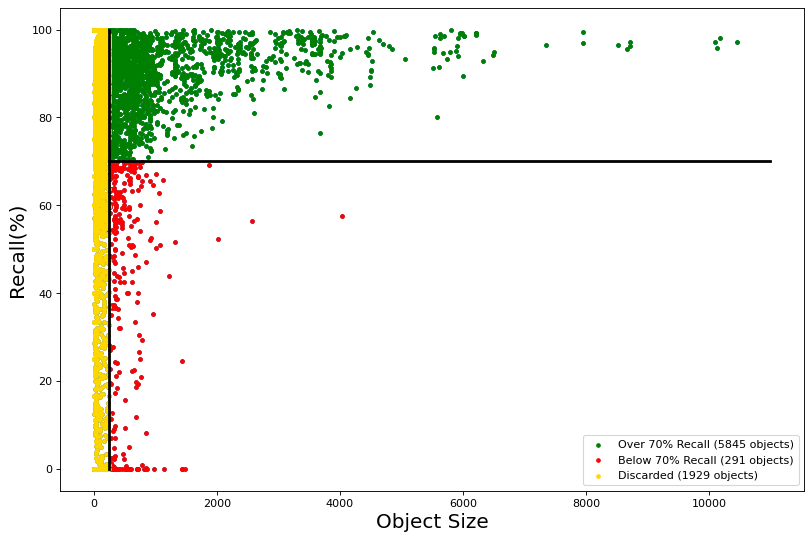

In [ ]:
# MI
# from matplotlib
from matplotlib.pyplot import figure
import matplotlib.path as mpath
figure(figsize=(12, 8), dpi=80)
points = np.column_stack([ovrr12, ovrr11])
verts = np.array([[250, 250, 12000, 12000,250 ], [100, 70, 70, 100,100]]).T
path = mpath.Path(verts)
points_inside = points[path.contains_points(points)]

verts1 = np.array([[250, 250, 12000, 12000,250 ], [70, -3, -3, 70,70]]).T
path1 = mpath.Path(verts1)
points_inside1 = points[path1.contains_points(points)]

verts2 = np.array([[0, 0, 250, 250,0 ], [100, -3, -3, 100,100]]).T
path2 = mpath.Path(verts2)
points_inside2 = points[path2.contains_points(points)]

figure(figsize=(12, 8), dpi=80)
op=4384
opp=4385
plt.scatter(ovrr12,ovrr11,s=10,label='_nolegend_')
plt.plot([250, 250], [100, 0], color='black', linewidth=2.5, linestyle='-',label='_nolegend_')
plt.plot([250, 11000], [70, 70], color='black', linewidth=2.5, linestyle='-',label='_nolegend_')
plt.scatter(points_inside[:,0], points_inside[:,1], c='g', s=10)
plt.scatter(points_inside1[:,0], points_inside1[:,1], c='r', s=10)
plt.scatter(points_inside2[:,0], points_inside2[:,1], c='gold', s=10)
plt.legend(['Over 70% Recall (5845 objects)','Below 70% Recall (291 objects)','Discarded (1929 objects)'])
# plt.xlim(-4,4)
# plt.ylim(-4,4)

# plt.plot(ovr12,ovr11,'.')
# plt.plot([250, 250, 12000, 12000,250 ], [110, -10, -10, 110,110], color='r', linewidth=1, linestyle='--')
# # plt.legend(["Trainning","Validation"])
plt.ylabel('Recall(%)',fontsize=18)
plt.xlabel('Object Size',fontsize=18)
plt.show()

<Figure size 960x640 with 0 Axes>

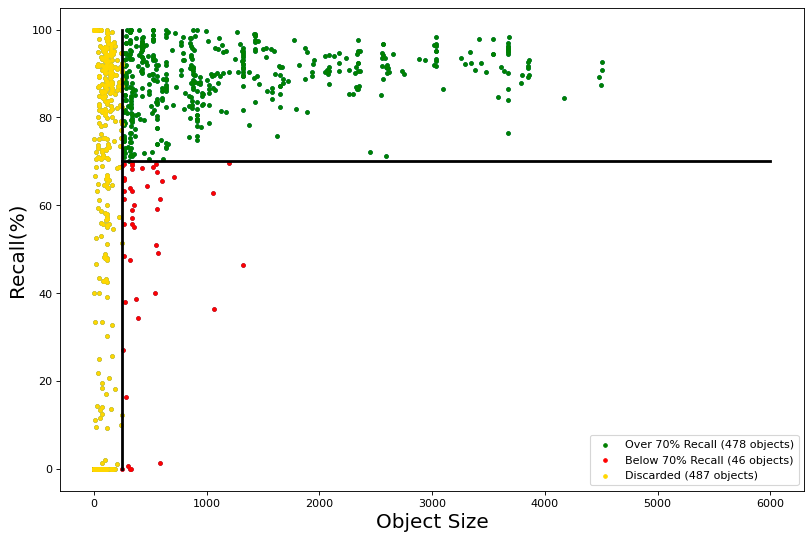

In [ ]:
# MI
# from matplotlib
from matplotlib.pyplot import figure
import matplotlib.path as mpath
figure(figsize=(12, 8), dpi=80)
points = np.column_stack([ovrr12a, ovrr1a])
verts = np.array([[250, 250, 12000, 12000,250 ], [100, 70, 70, 100,100]]).T
path = mpath.Path(verts)
points_inside = points[path.contains_points(points)]

verts1 = np.array([[250, 250, 12000, 12000,250 ], [70, -3, -3, 70,70]]).T
path1 = mpath.Path(verts1)
points_inside1 = points[path1.contains_points(points)]

verts2 = np.array([[0, 0, 250, 250,0 ], [100, -3, -3, 100,100]]).T
path2 = mpath.Path(verts2)
points_inside2 = points[path2.contains_points(points)]

figure(figsize=(12, 8), dpi=80)
op=4384
opp=4385
plt.scatter(ovrr12a,ovrr1a,s=10,label='_nolegend_')
plt.plot([250, 250], [100, 0], color='black', linewidth=2.5, linestyle='-',label='_nolegend_')
plt.plot([250, 6000], [70, 70], color='black', linewidth=2.5, linestyle='-',label='_nolegend_')
plt.scatter(points_inside[:,0], points_inside[:,1], c='g', s=10)
plt.scatter(points_inside1[:,0], points_inside1[:,1], c='r', s=10)
plt.scatter(points_inside2[:,0], points_inside2[:,1], c='gold', s=10)
plt.legend(['Over 70% Recall (478 objects)','Below 70% Recall (46 objects)','Discarded (487 objects)'])
# plt.xlim(-4,4)
# plt.ylim(-4,4)

# plt.plot(ovr12,ovr11,'.')
# plt.plot([250, 250, 12000, 12000,250 ], [110, -10, -10, 110,110], color='r', linewidth=1, linestyle='--')
# # plt.legend(["Trainning","Validation"])
plt.ylabel('Recall(%)',fontsize=18)
plt.xlabel('Object Size',fontsize=18)
plt.show()

<Figure size 960x640 with 0 Axes>

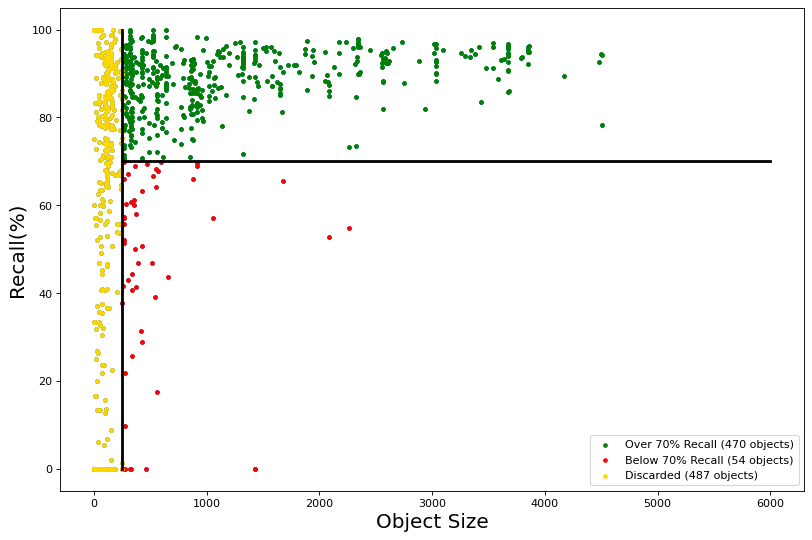

In [ ]:
# from matplotlib
from matplotlib.pyplot import figure
import matplotlib.path as mpath
figure(figsize=(12, 8), dpi=80)
points = np.column_stack([o12, o11])
verts = np.array([[250, 250, 12000, 12000,250 ], [100, 70, 70, 100,100]]).T
path = mpath.Path(verts)
points_inside = points[path.contains_points(points)]

verts1 = np.array([[250, 250, 12000, 12000,250 ], [70, -3, -3, 70,70]]).T
path1 = mpath.Path(verts1)
points_inside1 = points[path1.contains_points(points)]

verts2 = np.array([[0, 0, 250, 250,0 ], [100, -3, -3, 100,100]]).T
path2 = mpath.Path(verts2)
points_inside2 = points[path2.contains_points(points)]

figure(figsize=(12, 8), dpi=80)
op=4384
opp=4385
plt.scatter(o12, o11,s=10,label='_nolegend_')
plt.plot([250, 250], [100, 0], color='black', linewidth=2.5, linestyle='-',label='_nolegend_')
plt.plot([250, 6000], [70, 70], color='black', linewidth=2.5, linestyle='-',label='_nolegend_')
plt.scatter(points_inside[:,0], points_inside[:,1], c='g', s=10)
plt.scatter(points_inside1[:,0], points_inside1[:,1], c='r', s=10)
plt.scatter(points_inside2[:,0], points_inside2[:,1], c='gold', s=10)
plt.legend(['Over 70% Recall (470 objects)','Below 70% Recall (54 objects)','Discarded (487 objects)'])
# plt.xlim(-4,4)
# plt.ylim(-4,4)

# plt.plot(ovr12,ovr11,'.')
# plt.plot([250, 250, 12000, 12000,250 ], [110, -10, -10, 110,110], color='r', linewidth=1, linestyle='--')
# # plt.legend(["Trainning","Validation"])
plt.ylabel('Recall(%)',fontsize=18)
plt.xlabel('Object Size',fontsize=18)
plt.show()

<Figure size 960x640 with 0 Axes>

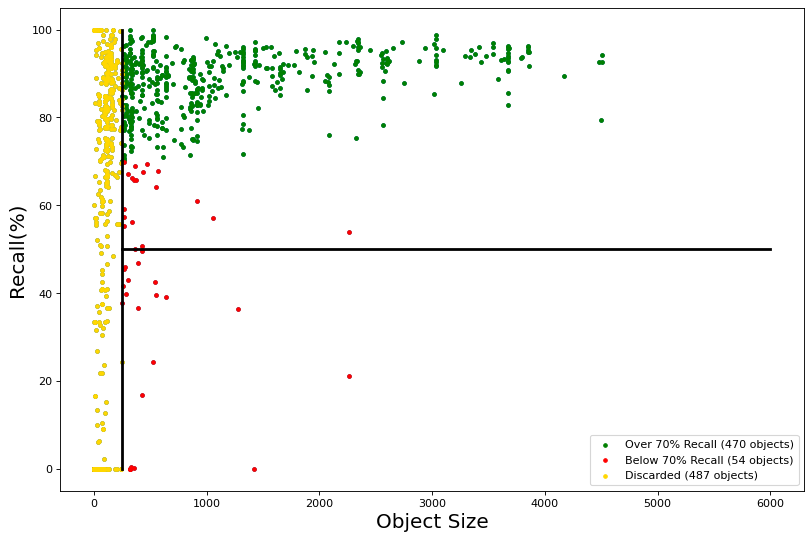

In [ ]:
# from matplotlib
from matplotlib.pyplot import figure
import matplotlib.path as mpath
figure(figsize=(12, 8), dpi=80)
points = np.column_stack([ovr12_, ovr1_])
verts = np.array([[250, 250, 12000, 12000,250 ], [100, 70, 70, 100,100]]).T
path = mpath.Path(verts)
points_inside = points[path.contains_points(points)]

verts1 = np.array([[250, 250, 12000, 12000,250 ], [70, -3, -3, 70,70]]).T
path1 = mpath.Path(verts1)
points_inside1 = points[path1.contains_points(points)]

verts2 = np.array([[0, 0, 250, 250,0 ], [100, -3, -3, 100,100]]).T
path2 = mpath.Path(verts2)
points_inside2 = points[path2.contains_points(points)]

figure(figsize=(12, 8), dpi=80)
op=4384
opp=4385
plt.scatter(ovr12_, ovr1_,s=10,label='_nolegend_')
plt.plot([250, 250], [100, 0], color='black', linewidth=2.5, linestyle='-',label='_nolegend_')
plt.plot([250, 6000], [50, 50], color='black', linewidth=2.5, linestyle='-',label='_nolegend_')
plt.scatter(points_inside[:,0], points_inside[:,1], c='g', s=10)
plt.scatter(points_inside1[:,0], points_inside1[:,1], c='r', s=10)
plt.scatter(points_inside2[:,0], points_inside2[:,1], c='gold', s=10)
plt.legend(['Over 70% Recall (470 objects)','Below 70% Recall (54 objects)','Discarded (487 objects)'])
# plt.xlim(-4,4)
# plt.ylim(-4,4)

# plt.plot(ovr12,ovr11,'.')
# plt.plot([250, 250, 12000, 12000,250 ], [110, -10, -10, 110,110], color='r', linewidth=1, linestyle='--')
# # plt.legend(["Trainning","Validation"])
plt.ylabel('Recall(%)',fontsize=18)
plt.xlabel('Object Size',fontsize=18)
plt.show()

In [ ]:
def temp_diff(p1,labelIn,t1):
  kl=[]
  kernel = np.ones((5,5),np.uint8)
  t1=t1.numpy()
  ppo6=[]
  if labelIn[:,1,:,:].any()==1:
    #for i in range(1,labelIn.shape[1]):
    l=(labelIn[0,1,:,:].cpu().numpy()).astype(np.uint8)
    p=(((p1[0,1,:,:].cpu().numpy()).round()).astype(np.uint8))
    totalLabels_l, label_ids_l, values_l, centroid_l= cv2.connectedComponentsWithStats(l,16,cv2.CV_32S)
    # print(totalLabels_l)
    for i in range(1,totalLabels_l):
      lb=(label_ids_l==i).astype("uint8")
      dil = cv2.dilate(lb,kernel,iterations = 1)
      eq_i=(label_ids_l==i).astype("uint8")
      sum_eq=eq_i.sum()
      eq_t=(eq_i*t1).sum()
      diff=dil-lb
      # if diff==labelIn[:,2:,:,:].any():
      #   diff=0
      diff_i=(diff).astype("uint8")
      sum_diff=diff_i.sum()
      diff_t=(diff_i*t1).sum()
      kl.append([eq_t/sum_eq-diff_t/sum_diff])

      s=(cv2.bitwise_and(p,lb)).sum()
      s_es=lb.sum()
    # sr.append(s)
    # s_esr.append(s_es)
      pero6=(s/s_es)
      ppo6.append(pero6)
      # return print('object temperature is ',eq_t/sum_eq,'surrounding temperature is ',diff_t/sum_diff)
  return kl,ppo6

In [ ]:
# # vallo[0], ovr[0]
pllo12=[]
# pllo=[]
# for i in range(0,len(ovr)):
#   k=len(ovr[i])
#   print(k)
#   for k in range(0,k):
#     k1=(ovr[i][k])
    
#     pllo.append(np.array(k1).reshape(1,-1))
#     print(pllo)
    # if 
    # for j in range(0,k1):
    #   k112=ovr[i][k][k1]
    #   pllo.append(k112)
    #   print(pllo)

for ii in range(0,len(vallo)):
  kk=len(vallo[ii])
  for k32 in range(0,kk):
    k11=(vallo[i][k32])
    pllo12.append(k11)
# vallo
# len(pllo),len(pllo1)
# plt.plot(pllo,pllo1)

IndexError: ignored

In [ ]:
(np.array(vallo[1]).reshape(1,-1)).shape

IndexError: ignored

In [ ]:
ovr[1]

[[72.72727272727273,
  95.0,
  88.0,
  86.73621460506706,
  76.19047619047619,
  95.0,
  85.71428571428571,
  85.18518518518519,
  0.0],
 [59.32203389830508, 0.0, 0.0, 86.10451306413302]]

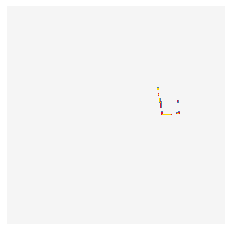

In [ ]:
# import cv2
# a=cv2.imread('/content/drive/MyDrive/MIDD/working_MIDD_CODES2/DataSet/GT/frame_000723.png',0)
# plt.imshow(pred)
# region_cal(score,label)
# np.unique(label1)
# drgb.shape
# d=drgb
# plot1=torch.squeeze(d)
# plot1=plot1[127].cpu().detach().numpy()
# plot1= cv2.resize(plot1, dsize=(192,192), interpolation=cv2.INTER_LINEAR)
# plt.imshow(plot1,cmap='jet')
# plt.axis('off')
label1=np.argmax(np.squeeze(label.cpu().data.numpy()),0)
discrete_matshow(label1-pred,p)
# plt.imshow(cv2.subtract(label1,pred),cmap='binary')


(-0.5, 191.5, 191.5, -0.5)

<Figure size 960x640 with 0 Axes>

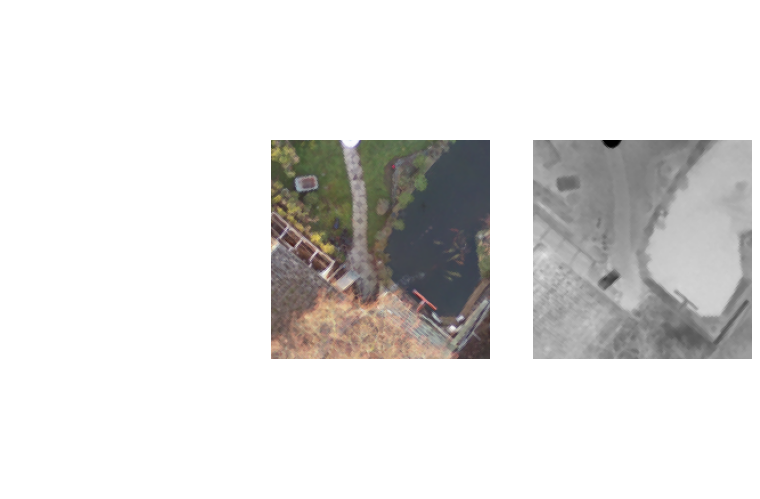

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(12, 8), dpi=80)
difference=cv2.subtract(label1,pred1)
# Conv_hsv_Gray = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)
# ret, mask = cv2.threshold(Conv_hsv_Gray, 0, 255,cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)
# difference[mask != 255] = [0, 0, 255]
# np.unique(difference)
# import os
ttest2 = 'frame_006651.png'
rr='/content/drive/MyDrive/MIDD/working_MIDD_CODES2/DataSet/RGB'
tt='/content/drive/MyDrive/MIDD/working_MIDD_CODES2/DataSet/FLIR'
# pred1 = np.argmax(np.squeeze(score1.cpu().data.numpy()),0)
# pred2 = np.argmax(np.squeeze(score2.cpu().data.numpy()),0)
figure(figsize=(12, 8), dpi=80)
plt.subplot(1,3,1)
# plt.imshow(difference,'binary')
plt.axis('off')
plt.subplot(1,3,2)
import matplotlib.image as mpimg

plt.imshow(mpimg.imread(os.path.join(rr,ttest2)))
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(cv2.imread(os.path.join(tt,ttest2)))
plt.axis('off')

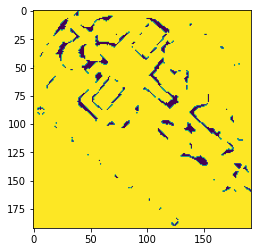

In [ ]:
c1=cv2.imread('/content/drive/MyDrive/MIDD/working_MIDD_CODES2/DataSet/Sub_GT3/frame_001105.png',0)
plt.imshow(d1)

(-0.5, 191.5, 191.5, -0.5)

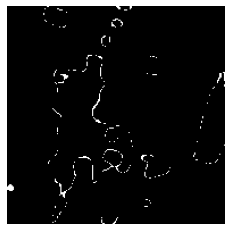

In [ ]:
difference=cv2.subtract(pred1,pred2)
difference1=difference.reshape(-1)
for i in range (0,difference.size):
  if difference1[i]==0:
    difference1[i]=255
  else:
    difference1[i]=0
d1=difference1.reshape(192,192)
plt.imshow(d1,'binary')
# plt.imshow(mpimg.imread(os.path.join(rr,ttest2)))
# plt.imshow(cv2.imread(os.path.join(tt,ttest2)))
plt.axis('off')


In [ ]:
((d1==0).sum()/((d1==255).sum()+(d1==0).sum()))*100

1.4133029513888888

In [ ]:
from prettytable import PrettyTable

def count_parameters(net):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in net.named_parameters():
        if not parameter.requires_grad: continue
        params = parameter.numel()
        table.add_row([name, params])
        total_params+=params
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params
    
count_parameters(net)

+-----------------------------------------+------------+
|                 Modules                 | Parameters |
+-----------------------------------------+------------+
|          rgb_net.base.0.weight          |    1728    |
|           rgb_net.base.0.bias           |     64     |
|          rgb_net.base.2.weight          |   36864    |
|           rgb_net.base.2.bias           |     64     |
|          rgb_net.base.5.weight          |   73728    |
|           rgb_net.base.5.bias           |    128     |
|          rgb_net.base.7.weight          |   147456   |
|           rgb_net.base.7.bias           |    128     |
|          rgb_net.base.10.weight         |   294912   |
|           rgb_net.base.10.bias          |    256     |
|          rgb_net.base.12.weight         |   589824   |
|           rgb_net.base.12.bias          |    256     |
|          rgb_net.base.14.weight         |   589824   |
|           rgb_net.base.14.bias          |    256     |
|          rgb_net.base.17.weig

52429197

In [ ]:
from prettytable import PrettyTable

def count_parameters(net):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in net.named_parameters():
        if not parameter.requires_grad: continue
        params = parameter.numel()
        table.add_row([name, params])
        total_params+=params
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params
    
count_parameters(net)
52429197-37567237

+-----------------------------------------+------------+
|                 Modules                 | Parameters |
+-----------------------------------------+------------+
|          rgb_net.base.0.weight          |    1728    |
|           rgb_net.base.0.bias           |     64     |
|          rgb_net.base.2.weight          |   36864    |
|           rgb_net.base.2.bias           |     64     |
|          rgb_net.base.5.weight          |   73728    |
|           rgb_net.base.5.bias           |    128     |
|          rgb_net.base.7.weight          |   147456   |
|           rgb_net.base.7.bias           |    128     |
|          rgb_net.base.10.weight         |   294912   |
|           rgb_net.base.10.bias          |    256     |
|          rgb_net.base.12.weight         |   589824   |
|           rgb_net.base.12.bias          |    256     |
|          rgb_net.base.14.weight         |   589824   |
|           rgb_net.base.14.bias          |    256     |
|          rgb_net.base.17.weig

14861960

(-0.5, 191.5, 191.5, -0.5)

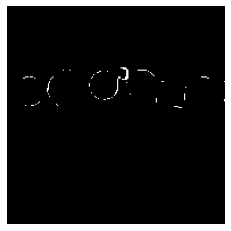

In [ ]:
difference1=difference.reshape(-1)
plt.imshow(d1,'binary')
# plt.imshow(mpimg.imread(os.path.join(rr,ttest2)))
# plt.imshow(cv2.imread(os.path.join(tt,ttest2)))
plt.axis('off')
# d1

(-0.5, 191.5, 191.5, -0.5)

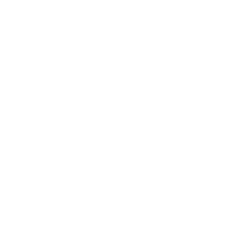

In [ ]:
from PIL import Image
im = Image.open('/content/drive/MyDrive/MIDD/working_MIDD_CODES2/FLIR_RAW_new/frame_000783.tiff')
im = Image.open('/content/drive/MyDrive/MIDD/working_MIDD_CODES2/FLIR_RAW_new/frame_000783.tiff')
im.show()
# im.show()

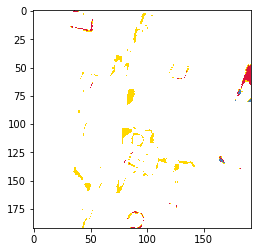

In [ ]:

import matplotlib
def discrete_matshow(data,data1):
    # get discrete colormap
    label = [0,1,2,3]
    colors = ['white','gold','crimson','steelblue']
    # figure, (axes1, axes2) = plt.subplots(ncols = 2)
    # set limits .5 outside true range
    # mat = plt.matshow(data, cmap=matplotlib.colors.ListedColormap(colors), vmin=np.min(label) - 0.5, 
    #                   vmax=np.max(label) + 0.5)
    
    # tell the colorbar to tick at integers
    # axis('off')
    # plt.subplot(1,2,1)
    plt.imshow(data, cmap=matplotlib.colors.ListedColormap(colors), vmin=np.min(label) - 0.5,vmax=np.max(label) + 0.5)
    # plt.title('Ground Truth')
    # plt.axis('off')
    # plt.box()
    # plt.subplot(1,2,2)
    # plt.imshow(data1, cmap=matplotlib.colors.ListedColormap(colors), vmin=np.min(label) - 0.5, vmax=np.max(label) + 0.5)
    # # plt.title('Prediction')
    # plt.axis('off')
    # plt.tick_params(axis='x', colors='white')
    # plt.tick_params(axis='y', colors='white')

# generate data
discrete_matshow((label1-pred),pred)

In [ ]:
# plt.imshow(label[0,3,:,:].cpu())
# import cv2
# cv2.connectedComponentsWithStats(label[0,3,:,:].cpu(),4,cv2.CV_32S)
# # np.unique(a1[:,:,1])
# cv2.connectedComponents

l=(label[0,2,:,:].cpu().numpy()).astype(np.uint8)
p=((score[0,2,:,:].cpu().numpy()).round()).astype(np.uint8)

# def region_cal(scoreIn,labelIn):
#   for i in range(0,labelIn.shape[1]):
#     l=(labelIn[0,i,:,:].cpu().numpy()).astype(np.uint8)
#     p=((scoreIn[0,i,:,:].cpu().numpy()).round()).astype(np.uint8)
#     # totalLabels, label_ids, values, centroid= cv2.connectedComponentsWithStats(l,8,cv2.CV_32S)
#     # (totalLabels, label_ids, values, centroid) = analysis
#     #getting the intial labels
#     totalLabels_p, label_ids_p, values_p, centroid_p= cv2.connectedComponentsWithStats(p,8,cv2.CV_32S)
#     totalLabels_l, label_ids_l, values_l, centroid_l= cv2.connectedComponentsWithStats(l,8,cv2.CV_32S)

#     #elimination of small areas
#     output = np.zeros(l.shape, dtype="uint8")
#     p_area_plow=eliminator_(label_ids_p,totalLabels_p,values_p)
#     l_area_plow=eliminator_(label_ids_l,totalLabels_l,values_l)

#     #again get all updated labels information
#     totalLabels_pu, label_ids_pu, values_pu, centroid_pu= cv2.connectedComponentsWithStats(p_area_plow,8,cv2.CV_32S)
#     totalLabels_lu, label_ids_lu, values_lu, centroid_lu= cv2.connectedComponentsWithStats(l_area_plow,8,cv2.CV_32S)
#     print(sum_each(label_ids_pu,label_ids_lu,totalLabels_lu))
import cv2
def eliminator_(label_in,totalL,val):
  # global lab_out,componentMask1
  output52 = np.zeros(label_in.shape, dtype="uint8")
  for i in range(1, totalL):
    # Area of the component
    area = val[i, cv2.CC_STAT_AREA]
    
    if area > 400:
      componentMask = (label_in == i).astype("uint8")
      # componentMask=cv2.bitwise_or(output, componentMask1)
      output52=cv2.bitwise_or(output52, componentMask)
  return output52

def sum_each(in1,in2,num_labels):
  sr=[]
  s=[]
  s_es=[]
  s_esr=[]
  ppo=[]
  cc=0
  for i in range(1,num_labels):
    s=((cv2.bitwise_and((in1).astype("uint8"),(in2==i).astype("uint8"))).sum())
    s_es=((in2==i).astype("uint8")).sum()
    # sr.append(s)
    # s_esr.append(s_es)
    pero=(s/s_es)*100
    ppo.append(pero)
    if (pero>=60):
      cc+=1
    s_esr=(cc/(num_labels-1))*100
  #   if pero>50:
  #     count+=1
  return cc,ppo,s_esr,num_labels,s,s_es
  # return print('overlapping objects',s_esr),print('Number of objects',num_labels-1) 
  # return s_esr
def region_cal(scoreIn,labelIn):
  pll=[]
  for i in range(1,labelIn.shape[1]):
    l=(labelIn[0,i,:,:].cpu().numpy()).astype(np.uint8)
    p=((scoreIn[0,i,:,:].cpu().numpy()).round()).astype(np.uint8)
    # totalLabels, label_ids, values, centroid= cv2.connectedComponentsWithStats(l,16,cv2.CV_32S)
    # (totalLabels, label_ids, values, centroid) = analysis
    #getting the intial labels
    totalLabels_p, label_ids_p, values_p, centroid_p= cv2.connectedComponentsWithStats(p,16,cv2.CV_32S)
    totalLabels_l, label_ids_l, values_l, centroid_l= cv2.connectedComponentsWithStats(l,16,cv2.CV_32S)

    #elimination of small areas
    output = np.zeros(l.shape, dtype="uint8")
    p_area_plow=eliminator_(label_ids_p,totalLabels_p,values_p)
    l_area_plow=eliminator_(label_ids_l,totalLabels_l,values_l)

    #again get all updated labels information
    totalLabels_pu, label_ids_pu, values_pu, centroid_pu= cv2.connectedComponentsWithStats(p_area_plow,16,cv2.CV_32S)
    totalLabels_lu, label_ids_lu, values_lu, centroid_lu= cv2.connectedComponentsWithStats(l_area_plow,16,cv2.CV_32S)
    overlaps=sum_each(p,label_ids_lu,totalLabels_lu)
    print(overlaps)
    pll.append(overlaps)
    # return pll
    # print('prediction centroid',centroid_pu)
    # print('Label centroid',centroid_lu)
lp=region_cal(score,label)

(1, [89.0795631825273], 100.0, 2, 3997, 4487)
(0, [], [], 1, [], [])
(1, [96.84123025768912], 100.0, 2, 1165, 1203)


In [ ]:
# updated
from pyparsing.helpers import Empty
from math import nan
import cv2
# ttest=['frame_000783.png','frame_000783.png']
def eliminator_(label_in,totalL,val,sz):
  # global lab_out,componentMask1
  output52 = np.zeros(label_in.shape, dtype="uint8")
  for i in range(1, totalL):
    # Area of the component
    area = val[i, cv2.CC_STAT_AREA]
    
    if area > sz:
      componentMask = (label_in == i).astype("uint8")
      # componentMask=cv2.bitwise_or(output, componentMask1)
      output52=cv2.bitwise_or(output52, componentMask)
  return output52

def sum_each(in1,in2,num_labels,threshold):
  sr=[]
  s=[]
  s_es=[]
  s_esr=[]
  ppo=[]
  cc=0
  for i in range(1,num_labels):
    s=((cv2.bitwise_and((in1).astype("uint8"),(in2==i).astype("uint8"))).sum())
    s_es=((in2==i).astype("uint8")).sum()
    # sr.append(s)
    # s_esr.append(s_es)
    pero=(s/s_es)*100
    ppo.append(pero)
    if (pero>=threshold):
      cc+=1
    s_esr=(cc/(num_labels-1))*100
  #   if pero>50:
  #     count+=1
  return ppo

def Accu(in1,in2,num_labels):
  ppo1=[]
  for i in range(1,num_labels):
    s1=((cv2.bitwise_and((in1==i).astype("uint8"),(in2).astype("uint8"))).sum())
    s_es1=((in1==i).astype("uint8")).sum()
    # sr.append(s)
    # s_esr.append(s_es)
    pero1=(s1/s_es1)*100
    ppo1.append(pero1)
  #   if pero>50:
  #     count+=1
  return ppo1
  # return print('overlapping objects',s_esr),print('Number of objects',num_labels-1) 
  # return s_esr
# pero2=[]
def Accu_pix(in1,in2):
    # global pero2
    
  # for i in range(1,num_labels):
    pero2=0
    s2=((cv2.bitwise_and((in1).astype("uint8"),(in2).astype("uint8"))).sum())
    s_es2=((in1).astype("uint8")).sum()
    # sr.append(s)
    # s_esr.append(s_es)
    if s2>0:
      pero2=(s2/s_es2)*100
    ppo2=pero2
    # ppo2.append(pero1)
  #   if pero>50:
  #     count+=1
    return ppo2
def sum_pix(in1,in2):
    # global pero2
    
  # for i in range(1,num_labels):
    pero3=0
    s3=((cv2.bitwise_and((in1).astype("uint8"),(in2).astype("uint8"))).sum())
    s_es3=((in2).astype("uint8")).sum()
    # sr.append(s)
    # s_esr.append(s_es)
    # print(s3,s_es3)
    if s3>0:
      pero3=(s3/s_es3)*100
    ppo3=pero3
    
    # ppo2.append(pero1)
  #   if pero>50:
  #     count+=1
    return ppo3
def region_cal(scoreIn,labelIn,t,object_size,namee):
  pll=[]
  klp=[]
  pll1=[]
  pll2=[]
  pll3=[]
  valo=[]
  plll=[]
  pll4z=[]
  if labelIn[:,:,:,:].any()==1:
    for i in range(1,2):
      l=(labelIn[0,i,:,:].cpu().numpy()).astype(np.uint8)
      p=((scoreIn[0,i,:,:].cpu().numpy()).round()).astype(np.uint8)
      # totalLabels, label_ids, values, centroid= cv2.connectedComponentsWithStats(l,16,cv2.CV_32S)
      # (totalLabels, label_ids, values, centroid) = analysis
      #getting the intial labels
      totalLabels_p, label_ids_p, values_p, centroid_p= cv2.connectedComponentsWithStats(p,16,cv2.CV_32S)
      totalLabels_l, label_ids_l, values_l, centroid_l= cv2.connectedComponentsWithStats(l,16,cv2.CV_32S)

      #elimination of small areas
      output = np.zeros(l.shape, dtype="uint8")
      p_area_plow=eliminator_(label_ids_p,totalLabels_p,values_p,object_size)
      l_area_plow=eliminator_(label_ids_l,totalLabels_l,values_l,object_size)

      #again get all updated labels information
      totalLabels_pu, label_ids_pu, values_pu, centroid_pu= cv2.connectedComponentsWithStats(p_area_plow,8,cv2.CV_32S)
      totalLabels_lu, label_ids_lu, values_lu, centroid_lu= cv2.connectedComponentsWithStats(l_area_plow,8,cv2.CV_32S)
      overlaps=(np.array(sum_each(p,label_ids_lu,totalLabels_lu,t)))
      overlaps1=((sum_each(p,label_ids_lu,totalLabels_lu,t)))
      # print('label',i)
      # print(overlaps)
      # if overlaps is not []:
      #   pll.append((overlaps.mean()))
      for i in range(1, totalLabels_lu):
        area1 = values_lu[i, cv2.CC_STAT_AREA]
        valo.append(area1)
      if overlaps.shape!=(0,):
        pll.append((overlaps.mean()))
        plll.append((overlaps1))
        print(plll)
        nn=namee
        pll4z.append(nn)
      accuracy1=np.array(Accu(label_ids_p,l,totalLabels_p))
      if accuracy1.shape!=(0,):
        pll1.append((accuracy1.mean()))
      accuracy2=np.array(Accu_pix(p,l))
      if accuracy2>0:
        pll2.append((accuracy2.mean()))
        # print(((l).astype("uint8")).sum())
      recall2=np.array(sum_pix(p,l))
      # print(recall2)
      if recall2>0:
        pll3.append((recall2.mean()))
        # print(pll3)
    return np.array(pll),np.array(pll1).mean(),np.array(pll2).mean(),np.array(pll3).mean(),valo,plll,pll4z
    # return np.array(pll),np.array(pll1).mean(),np.array(pll2).mean(),np.array(pll3).mean()
  else:
    return 0,0,0,0,0,0

  # return pll
    # print('prediction centroid',centroid_pu)
    # print('Label centroid',centroid_lu)
# lp=region_cal(score,label,70,225)
# torch.unique(torch.argmax(label,1))
# plt.imshow(torch.squeeze(torch.argmax(label,1)).cpu())

In [ ]:
# updated
from pyparsing.helpers import Empty
from math import nan
import cv2
# ttest=['frame_000783.png','frame_000783.png']
def eliminator_(label_in,totalL,val,sz):
  # global lab_out,componentMask1
  output52 = np.zeros(label_in.shape, dtype="uint8")
  for i in range(1, totalL):
    # Area of the component
    area = val[i, cv2.CC_STAT_AREA]
    
    if area > sz:
      componentMask = (label_in == i).astype("uint8")
      # componentMask=cv2.bitwise_or(output, componentMask1)
      output52=cv2.bitwise_or(output52, componentMask)
  return output52

def sum_each(in1,in2,num_labels,threshold):
  sr=[]
  s=[]
  s_es=[]
  s_esr=[]
  ppo=[]
  cc=0
  for i in range(1,num_labels):
    s=((cv2.bitwise_and((in1).astype("uint8"),(in2==i).astype("uint8"))).sum())
    s_es=((in2==i).astype("uint8")).sum()
    # sr.append(s)
    # s_esr.append(s_es)
    pero=(s/s_es)*100
    ppo.append(pero)
    if (pero>=threshold):
      cc+=1
    s_esr=(cc/(num_labels-1))*100
  #   if pero>50:
  #     count+=1
  return ppo

def Accu(in1,in2,num_labels):
  ppo1=[]
  for i in range(1,num_labels):
    s1=((cv2.bitwise_and((in1==i).astype("uint8"),(in2).astype("uint8"))).sum())
    s_es1=((in1==i).astype("uint8")).sum()
    # sr.append(s)
    # s_esr.append(s_es)
    pero1=(s1/s_es1)*100
    ppo1.append(pero1)
  #   if pero>50:
  #     count+=1
  return ppo1
  # return print('overlapping objects',s_esr),print('Number of objects',num_labels-1) 
  # return s_esr
# pero2=[]
def Accu_pix(in1,in2):
    # global pero2
    
  # for i in range(1,num_labels):
    pero2=0
    s2=((cv2.bitwise_and((in1).astype("uint8"),(in2).astype("uint8"))).sum())
    s_es2=((in1).astype("uint8")).sum()
    # sr.append(s)
    # s_esr.append(s_es)
    if s2>0:
      pero2=(s2/s_es2)*100
    ppo2=pero2
    # ppo2.append(pero1)
  #   if pero>50:
  #     count+=1
    return ppo2
def sum_pix(in1,in2):
    # global pero2
    
  # for i in range(1,num_labels):
    pero3=0
    s3=((cv2.bitwise_and((in1).astype("uint8"),(in2).astype("uint8"))).sum())
    s_es3=((in2).astype("uint8")).sum()
    # sr.append(s)
    # s_esr.append(s_es)
    # print(s3,s_es3)
    if s3>0:
      pero3=(s3/s_es3)*100
    ppo3=pero3
    
    # ppo2.append(pero1)
  #   if pero>50:
  #     count+=1
    return ppo3
def region_cal(scoreIn,labelIn,t,object_size,namee):
  pll=[]
  klp=[]
  pll1=[]
  pll2=[]
  pll3=[]
  valo=[]
  plll=[]
  pll4z=[]
  pll5=[]
  
  if labelIn[:,1,:,:].any()==1:
    for i in range(1,2):
      l=(labelIn[0,i,:,:].cpu().numpy()).astype(np.uint8)
      p=((scoreIn[0,i,:,:].cpu().numpy()).round()).astype(np.uint8)
      # totalLabels, label_ids, values, centroid= cv2.connectedComponentsWithStats(l,16,cv2.CV_32S)
      # (totalLabels, label_ids, values, centroid) = analysis
      #getting the intial labels
      totalLabels_p, label_ids_p, values_p, centroid_p= cv2.connectedComponentsWithStats(p,16,cv2.CV_32S)
      totalLabels_l, label_ids_l, values_l, centroid_l= cv2.connectedComponentsWithStats(l,16,cv2.CV_32S)

      #elimination of small areas
      output = np.zeros(l.shape, dtype="uint8")
      p_area_plow=eliminator_(label_ids_p,totalLabels_p,values_p,object_size)
      l_area_plow=eliminator_(label_ids_l,totalLabels_l,values_l,object_size)

      #again get all updated labels information
      totalLabels_pu, label_ids_pu, values_pu, centroid_pu= cv2.connectedComponentsWithStats(p_area_plow,8,cv2.CV_32S)
      totalLabels_lu, label_ids_lu, values_lu, centroid_lu= cv2.connectedComponentsWithStats(l_area_plow,8,cv2.CV_32S)
      overlaps=(np.array(sum_each(p,label_ids_lu,totalLabels_lu,t)))
      
      # print('label',i)
      # print(overlaps)
      # if overlaps is not []:
      #   pll.append((overlaps.mean()))
      for i in range(1, totalLabels_lu):
        area1 = values_lu[i, cv2.CC_STAT_AREA]
        valo.append((area1))
      if overlaps.shape!=(0,):
        pll.append((overlaps))
        plll.append((overlaps))
        nn=namee
        pll4z.append(nn)
      accuracy1=np.array(Accu(label_ids_l,p,totalLabels_l))
      pll5.append(accuracy1)
      print(accuracy1)
      if accuracy1.shape!=(0,):
        pll1.append((accuracy1.mean()))
        
      accuracy2=np.array(Accu_pix(p,l))
      if accuracy2>0:
        pll2.append((accuracy2.mean()))
        # print(((l).astype("uint8")).sum())
      recall2=np.array(sum_pix(p,l))
      # print(recall2)
      if recall2>0:
        pll3.append((recall2.mean()))
        # print(pll3)
    # return np.array(pll),np.array(pll1).mean(),np.array(pll2).mean(),np.array(pll3).mean(),np.array(valo).max(),plll
    return np.array(pll),np.array(pll1).mean(),np.array(pll2).mean(),np.array(pll3).mean(),pll4z,pll5,valo
  else:
    return 0,0,0,0,0,0,0

  # return pll
    # print('prediction centroid',centroid_pu)
    # print('Label centroid',centroid_lu)
# lp=region_cal(score,label,70,225)
# torch.unique(torch.argmax(label,1))
# plt.imshow(torch.squeeze(torch.argmax(label,1)).cpu())

In [ ]:
# totalLabels, label_ids, values, centroid= cv2.connectedComponentsWithStats(l,8,cv2.CV_32S)
# (totalLabels, label_ids, values, centroid) = analysis
#getting the intial labels
totalLabels_p, label_ids_p, values_p, centroid_p= cv2.connectedComponentsWithStats(p,8,cv2.CV_32S)
totalLabels_l, label_ids_l, values_l, centroid_l= cv2.connectedComponentsWithStats(l,8,cv2.CV_32S)

#elimination of small areas
output = np.zeros(l.shape, dtype="uint8")
p_area_plow=eliminator_(label_ids_p,totalLabels_p,values_p)
l_area_plow=eliminator_(label_ids_l,totalLabels_l,values_l)

#again get all updated labels information
totalLabels_pu, label_ids_pu, values_pu, centroid_pu= cv2.connectedComponentsWithStats(p_area_plow,8,cv2.CV_32S)
totalLabels_lu, label_ids_lu, values_lu, centroid_lu= cv2.connectedComponentsWithStats(l_area_plow,8,cv2.CV_32S)
plt.subplot(1,2,1)
plt.imshow((label_ids_lu))
plt.subplot(1,2,2)
plt.imshow(label_ids_p)
print((totalLabels_lu))
np.unique(label_ids_lu)
# centroid_lu,centroid_pu

NameError: ignored

In [ ]:
print(math.pow(2,10)

SyntaxError: ignored

In [ ]:
3.7*((0.04/0.00406)*(1+10/100))+(10/100)

40.198522167487695

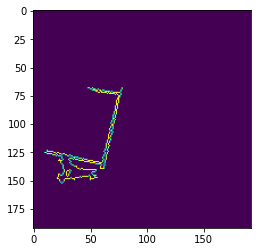

In [ ]:
(p_area_plow)

In [ ]:
pl=1
kl=((cv2.bitwise_and((label_ids_lu==pl).astype("uint8"),(p_area_plow).astype("uint8"))))
print(kl.sum())
print((label_ids_lu==pl).astype("uint8").sum())
# 466/520
# print(values_p)
plt.subplot(1,3,1)
plt.imshow((label_ids_lu==1).astype("uint8"))
plt.subplot(1,3,2)
plt.imshow((p_area_plow).astype("uint8"))
plt.subplot(1,3,3)
plt.imshow(label_ids_lu-p_area_plow,cmap='gray')
# 524/609
np.unique(label_ids_lu)
102/127

NameError: ignored

In [ ]:
confus=np.array([[38046757,   102197,    86323,   198113],
       [   71301,   538182,      740,     2584],
       [   78362,      691,   498350,    11473],
       [  239329,    10042,    12738,  1316770]])

In [ ]:
# confus[1][1]/(confus[1][1]+confus[1][0]+confus[1][2]+confus[1][3]+confus[0][1]+confus[2][1]+confus[3][1])
# print(confus[0][0]/(confus[0][0]+confus[0][1]+confus[0][2]+confus[0][3]+confus[0][1]+confus[0][2]+confus[0][3]))
# confus[2][2]/(confus[0][0]+confus[0][1]+confus[0][2]+confus[0][3]+confus[0][1]+confus[0][2]+confus[0][3])
print(np.array(([confus[0,0]/(confus[0].sum()+confus[:,0].sum()-confus[0,0]),confus[0,1]/(confus[1].sum()+confus[:,1].sum()-confus[0,1]),confus[0,2]/(confus[1].sum()+confus[:,2].sum()-confus[0,2]),confus[0,3]/(confus[1].sum()+confus[:,3].sum()-confus[0,3])])).sum())
print(confus[1,1]/(confus[1].sum()+confus[:,1].sum()-confus[1,1]))
print(confus[2,2]/(confus[2].sum()+confus[:,2].sum()-confus[2,2]))
print(confus[3,3]/(confus[3].sum()+confus[:,3].sum()-confus[3,3]))

1.2466770901101383
0.7415661596418537
0.7236338660939744
0.7351948494988133


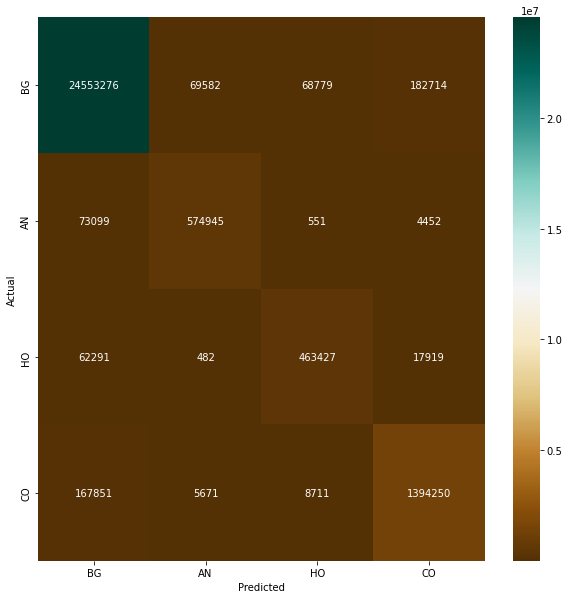

AttributeError: ignored

In [ ]:
# MI
import seaborn as sns

# cm = confusion_matrix(y_test, y_pred)
# Normalise
cmn = confus.astype('float') / confus.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(confus, annot=True, fmt='.0f',cmap="BrBG", xticklabels= ['BG','AN','HO','CO'], yticklabels= ['BG','AN','HO','CO'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)
sns.con

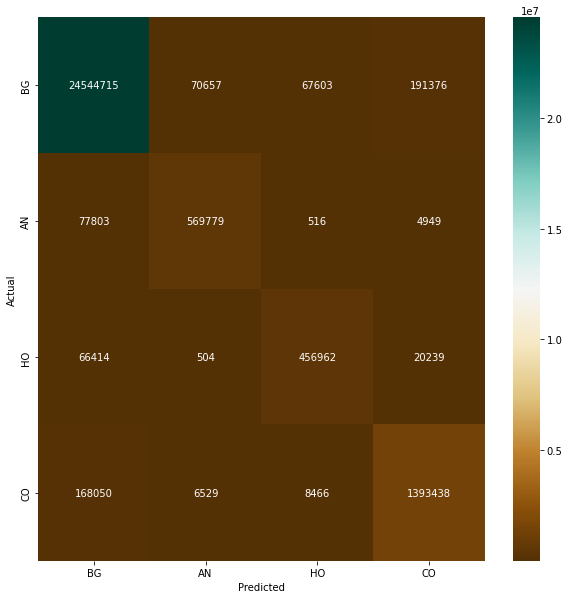

AttributeError: ignored

In [ ]:
import seaborn as sns

# cm = confusion_matrix(y_test, y_pred)
# Normalise
cmn = confus.astype('float') / confus.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(confus, annot=True, fmt='.0f',cmap="BrBG", xticklabels= ['BG','AN','HO','CO'], yticklabels= ['BG','AN','HO','CO'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)
sns.con

In [ ]:

def connected_component_label(path):
    
    # Getting the input image
    img = cv2.imread(path, 0)
    # Converting those pixels with values 1-127 to 0 and others to 1
    img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]
    # Applying cv2.connectedComponents() 
    num_labels, labels = cv2.connectedComponents(img)
    
    # Map component labels to hue val, 0-179 is the hue range in OpenCV
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # Converting cvt to BGR
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    
    
    # Showing Original Image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Orginal Image")
    plt.show()
    
    #Showing Image after Component Labeling
    plt.imshow(cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Image after Component Labeling")
    plt.show()